In [1]:
import numpy as np
import pandas as pd
import sys

sys.path.append(r'\\TAMAGHNA-PC\Users\tamaghna\OneDrive\Python\Projects\Ipython')

from Simulation import *

%matplotlib inline
import matplotlib.pyplot as plt

0.65542377348441372

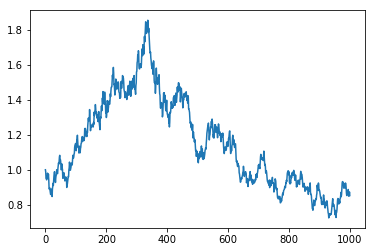

In [70]:
sample_path = fBM_Levinson(1000, 0.5, sigma=20, cumm=0)
sample_path = np.cumprod(1+sample_path)
plt.plot(sample_path)
np.mean(np.diff(np.log(sample_path))**2)*100*np.sqrt(252)

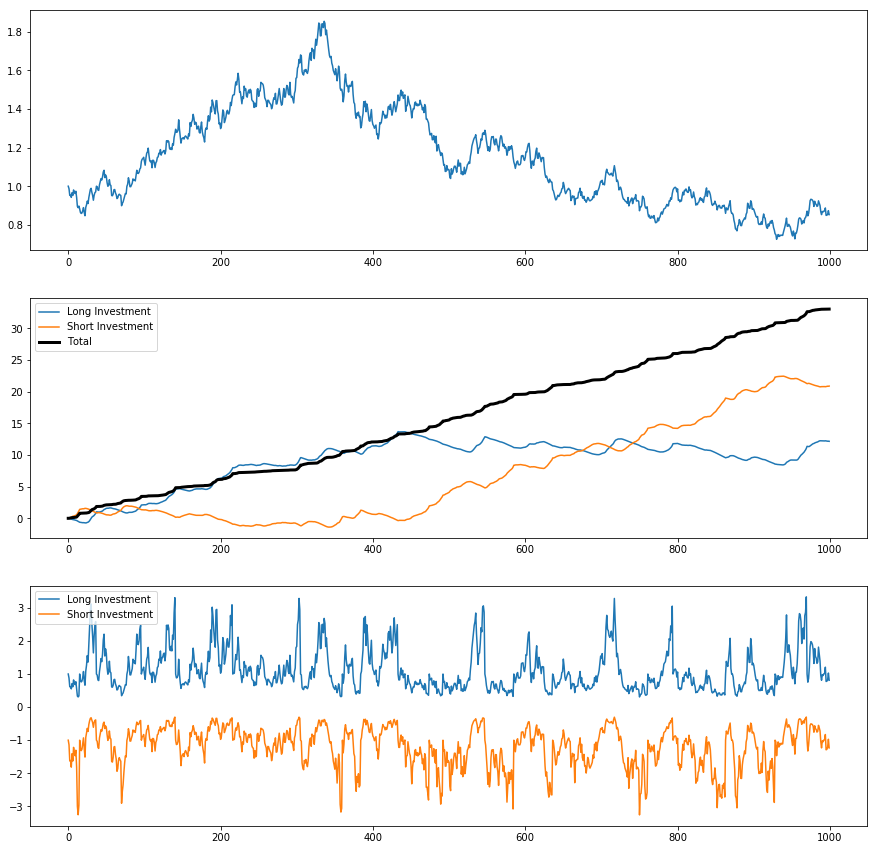

In [72]:
K = 10
p = sample_path

I0 = 1
Imin = 0.3

gL = [0]
gS = [0]
IL = [I0]
IS = [-I0]

for i in range(1, len(p)):
    r = p[i] / p[i-1]
    iL = r**K * IL[i-1]
    new_g = IL[i-1]/K * r**K - I0/K
    
    iS = r**-K * IS[i-1]
    new_gs = -IS[i-1]/K * r**-K - I0/K
    
    if iL < Imin or np.abs(iS) < Imin:
        iL = I0
        iS = -I0
    
    gL.append(new_g)
    gS.append(new_gs)
    IL.append(iL)
    IS.append(iS)

gL = np.array(gL)
gS = np.array(gS)
g = gL + gS

vL = np.cumsum(gL)
vS = np.cumsum(gS)
v = np.cumsum(g)

plt.figure(figsize=(15,15))
plt.subplot(311)
plt.plot(sample_path)

plt.subplot(312)
plt.plot(vL, label='Long Investment')
plt.plot(vS, label='Short Investment')
plt.plot(v, label='Total', color='black', lw=3)
plt.legend()

plt.subplot(313)
plt.plot(IL, label='Long Investment')
plt.plot(IS, label='Short Investment')
plt.legend()

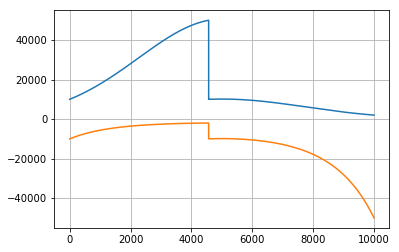

In [4]:
t = np.linspace(0, 100, 10000)
K = 4
I0 = V = 10000
p = 1 + 0.5 * np.sin(np.pi * t / 100)
Imin = 2000

IL = [I0]
IS = [-I0]
gL = [0]
gS = [0]
start_idx = 0
for i in range(len(p)):
    iL = I0 * (p[i]/p[start_idx-1])**K
    iS = -I0 * (p[i]/p[start_idx-1])**-K
    if iL <= Imin or -iS < Imin:
        iL=I0
        iS=-I0
        start_idx=i
    IL.append(iL)
    IS.append(iS)
    
plt.plot(IL)
plt.plot(IS)
plt.grid()

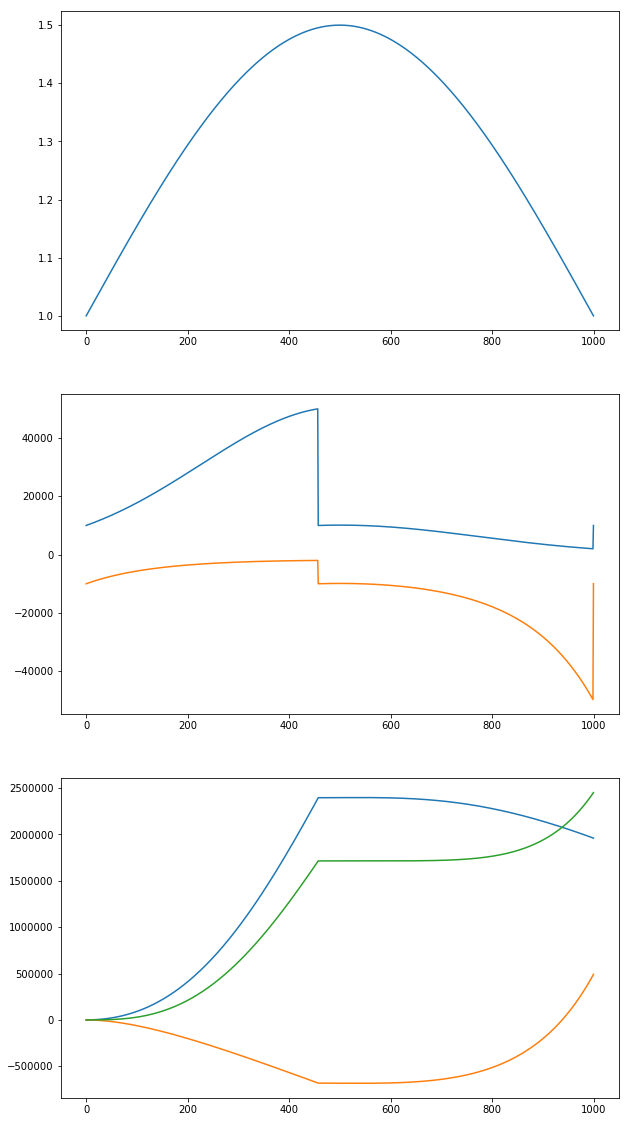

In [42]:
t = np.linspace(0, 100, 1000)
dt = t[1] - t[0]

p = 1 + 0.5 * np.sin(np.pi * t / 100)
rho = np.diff(np.log(p)) / dt

I0 = 10000
Imin = 2000

gL = [0]
gS = [0]
IL = [I0]
IS = [-I0]
for i in range(1, len(p)):
    r = p[i] / p[i-1]
    iL = r**K * IL[i-1]
    new_g = IL[i-1]/K * r**K - I0/K
    
    iS = r**-K * IS[i-1]
    new_gs = -IS[i-1]/K * r**-K - I0/K
    
    if iL < Imin or np.abs(iS) < Imin:
        iL = I0
        iS = -I0
    
    gL.append(new_g)
    gS.append(new_gs)
    IL.append(iL)
    IS.append(iS)

gL = np.array(gL)
gS = np.array(gS)

vL = np.cumsum(gL)
vS = np.cumsum(gS)

plt.figure(figsize=(10,20))
plt.subplot(311)
plt.plot(p)

plt.subplot(312)
plt.plot(IL)
plt.plot(IS)

plt.subplot(313)
plt.plot(vL)
plt.plot(vS)
plt.plot(vL + vS)